# Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Load Data

In [31]:
PATH_TEST = "/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv"
PATH_TRAIN = "/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv"

train_data = pd.read_csv(PATH_TRAIN)
test_data = pd.read_csv(PATH_TEST)

# Target Variable Distribution

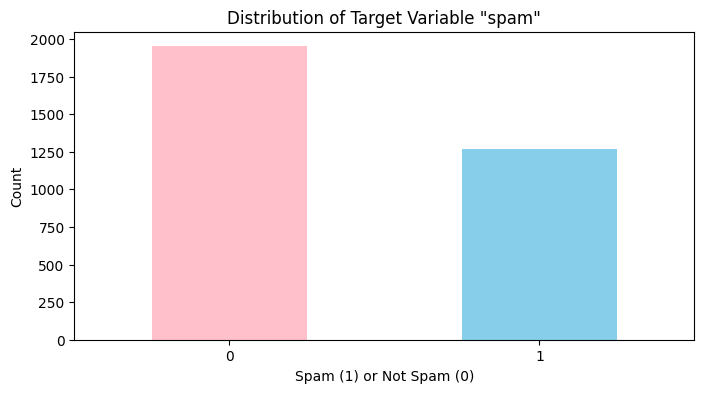

In [32]:
import matplotlib.pyplot as plt

train_data = pd.read_csv(PATH_TRAIN)

plt.figure(figsize=(8, 4))
train_data['spam'].value_counts().plot(kind='bar', color=['pink', 'skyblue'])
plt.title('Distribution of Target Variable "spam"')
plt.xlabel('Spam (1) or Not Spam (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
train_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


# Feature Distributions

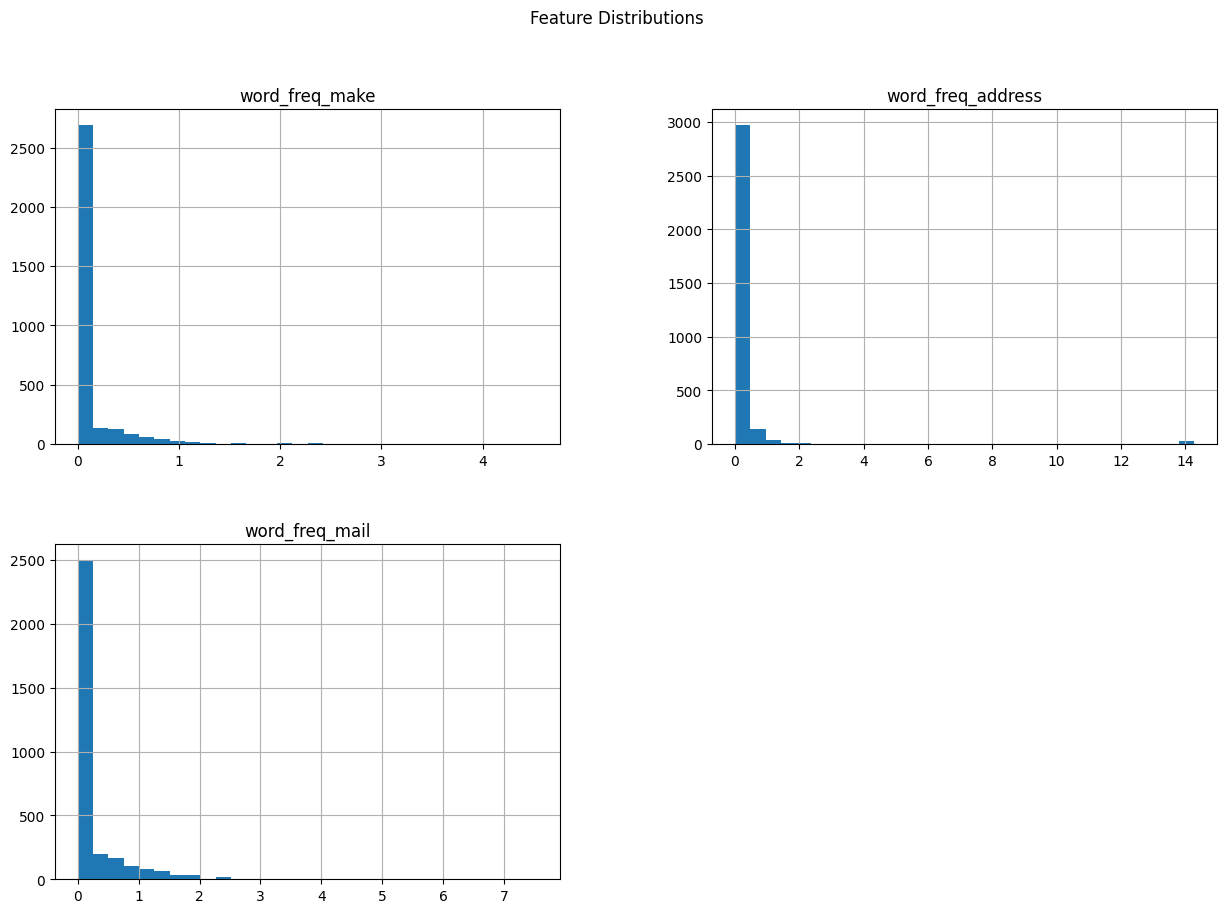

In [34]:
import seaborn as sns

key_features = ['word_freq_make', 'word_freq_address', 'word_freq_mail']  # Replace with actual feature names
train_data[key_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# Prepare Features and Labels

In [35]:
X_train = train_data.drop(columns=['ID', 'spam'])
y_train = train_data['spam']
X_test = test_data.drop(columns=['ID'])

# Scale Features

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Voting Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log=LogisticRegression()
rf=RandomForestClassifier()
svm=SVC()


voting_clf=VotingClassifier(
    estimators=[('lr',log),('rf',rf),('svc',svm)],
    voting='hard'
    
)
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_train_scaled)
y_test_pred = voting_clf.predict(X_test_scaled)


# Evaluate the model on the training set

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(f'Training Accuracy: {accuracy_score(y_train,y_pred)}')
print(classification_report(y_train,y_pred))

Training Accuracy: 0.9568322981366459
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1951
           1       0.96      0.93      0.94      1269

    accuracy                           0.96      3220
   macro avg       0.96      0.95      0.95      3220
weighted avg       0.96      0.96      0.96      3220



# Prepare Submission File

In [39]:
submission_df = pd.DataFrame({
    'ID': test_data['ID'],
    'spam': y_test_pred
})

submission_df.to_csv('Rania.csv', index=False)
